In [1]:
import numpy as npb
import pandas as pd 
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV,train_test_split
df= pd.read_csv('df-filteredfinalN.csv')
from six import StringIO  
from sklearn.tree import export_graphviz
import pydotplus
from sklearn.ensemble import RandomForestClassifier
import seaborn as sns



The following code aims to demonstrate the use of a Random Forest Classifier on the original features in the provided dataset and on a hybrid dataset that was found using the PCA features.The two csv files named 'df-filteredfinalN.csv' and 'PCAFeatures.csv' are used for loading the original dataset and the hybrid dataset respectively.

# 1. Original Dataset Features:

# Hyper-Parameter Tuning- Label 1('Confirmed'):

c:\python\python39\lib\site-packages\sklearn\model_selection\_search.py:285: UserWarning: The total space of parameters 20 is smaller than n_iter=200. Running 20 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Fitting 10 folds for each of 20 candidates, totalling 200 fits


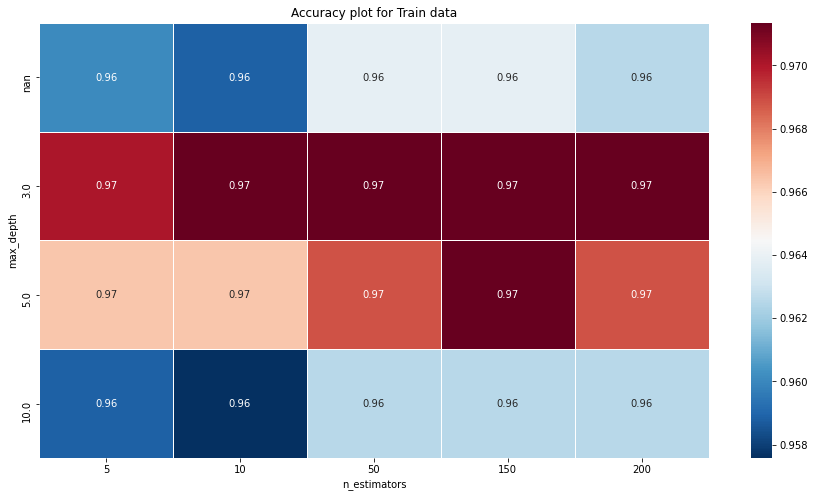

In [2]:
x=df[['Day','State ID','Lat','Long_','Incident_Rate','Active','Total_Test_Results','Case_Fatality_Ratio','Testing_Rate','Density Rank 2020 Census','SexRatio']].values

y=df['Confirmed'].values

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2, random_state = 0)

grid_param = {'n_estimators': [5,10,50,150,200],
             'max_depth':[3,5,10,None], 'random_state':[0]}
random_forest= RandomForestClassifier()

random_grid= RandomizedSearchCV(estimator= random_forest, param_distributions=grid_param, n_iter=200, cv=10, verbose=1, random_state=42,n_jobs=-1)
random_grid.fit(x_train,y_train)
ac_df=pd.DataFrame(random_grid.cv_results_['params'])
ac_df["accuracy"]=random_grid.cv_results_['mean_test_score']
ac_df=ac_df.pivot(index='max_depth',columns='n_estimators',values='accuracy')
plt.figure(figsize=(15,8))
sns.heatmap(data=ac_df,cmap='RdBu_r',
            annot=True,
            linewidth=0.5)
plt.title("Accuracy plot for Train data")
plt.show()

Figure 1 Accuracy plot for train data based on number of estimators and maximum depth in Hyper-Parameter Tuning- Label 1 for orginal database

Initially, the data is split with 80% of the data used for training and 20% percent of the data left for testing. The Random Forest Classifier is intialiazed with max depth being:{3,5,10,None}(1). The data is classified using Decision trees with the number of trees being: {5,10,50,150,200}. K-fold cross validation is used with k being 10 for the trees. 'RandomizedSearchCV' is used to find the best values for the classifier(2). The accuracy of the trained estimators is reported on a heat plot using the heatmap command from the Seaborn library(3).

# Best Parameter Evaluation:

In [3]:
random_grid.best_params_

{'random_state': 0, 'n_estimators': 10, 'max_depth': 3}

In [4]:
random_grid.best_score_

0.9713425925925925

In [5]:
random_grid.best_estimator_

RandomForestClassifier(max_depth=3, n_estimators=10, random_state=0)

The best parameter for the Random Forest Classifier is the one that has a max-depth of 3 with the number of trees being 10.

# Parameter Testing:

In [6]:
random_forest= RandomForestClassifier(max_depth=3, n_estimators=10, random_state=0)
random_forest.fit(x_train,y_train)
y_pred=random_forest.predict(x_test)
print("Accuracy on test set: " ,accuracy_score(y_test,y_pred))

Accuracy on test set:  0.9601990049751243


The accuracy of the test set for the trained classifier is approximately 96 percent and this shows that the classifier is great at predicting the output for the label with less than 5 percent of error.

# Hyper-Parameter Tuning- Label 2('Deaths'):

c:\python\python39\lib\site-packages\sklearn\model_selection\_search.py:285: UserWarning: The total space of parameters 20 is smaller than n_iter=200. Running 20 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Fitting 10 folds for each of 20 candidates, totalling 200 fits


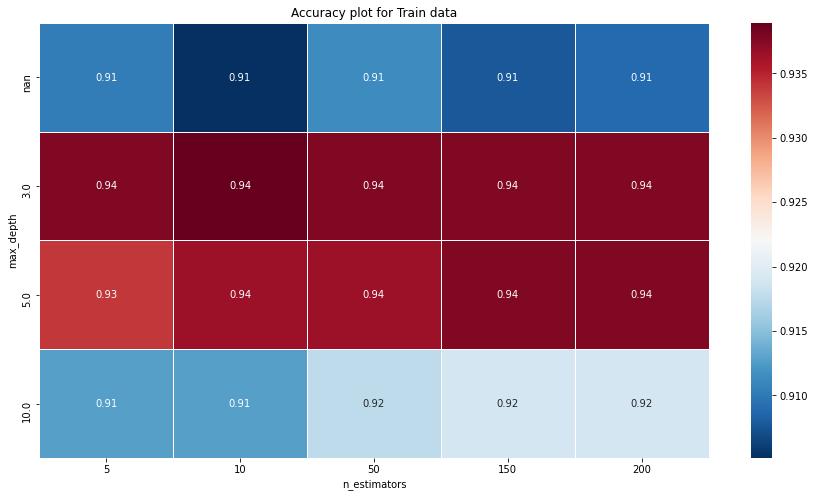

In [7]:
x=df[['Day','State ID','Lat','Long_','Incident_Rate','Active','Total_Test_Results','Case_Fatality_Ratio','Testing_Rate','Density Rank 2020 Census','SexRatio']].values

y1=df['Deaths'].values

x_train,x_test,y_train,y_test = train_test_split(x,y1,test_size = 0.2, random_state = 0)

grid_param = {'n_estimators': [5,10,50,150,200],
             'max_depth':[3,5,10,None], 'random_state':[0]}
random_forest= RandomForestClassifier()

random_grid= RandomizedSearchCV(estimator= random_forest, param_distributions=grid_param, n_iter=200, cv=10, verbose=1, random_state=42,n_jobs=-1)

random_grid.fit(x_train,y_train)

ac_df=pd.DataFrame(random_grid.cv_results_['params'])
ac_df["accuracy"]=random_grid.cv_results_['mean_test_score']
ac_df=ac_df.pivot(index='max_depth',columns='n_estimators',values='accuracy')
plt.figure(figsize=(15,8))
sns.heatmap(data=ac_df,cmap='RdBu_r',
            annot=True,
            linewidth=0.5)
plt.title("Accuracy plot for Train data")
plt.show()

Figure 2 Accuracy plot for train data based on number of estimators and maximum depth in Hyper-Parameter Tuning- Label 2 for orginal database

Initially, the data is split with 80% of the data used for training and 20% percent of the data left for testing. The Random Forest Classifier is intialiazed with max depth being:{3,5,10,None}(1). The data is classified using Decision trees with the number of trees being: {5,10,50,150,200}. K-fold cross validation is used with k being 10 for the trees. 'RandomizedSearchCV' is used to find the best values for the classifier(2). The accuracy of the trained estimators is reported on a heat plot using the heatmap command from the Seaborn library(3).

# Best Parameter Evaluation:

In [8]:
random_grid.best_params_

{'random_state': 0, 'n_estimators': 10, 'max_depth': 3}

In [9]:
random_grid.best_score_

0.9389197530864198

In [10]:
random_grid.best_estimator_

RandomForestClassifier(max_depth=3, n_estimators=10, random_state=0)

The best parameter for the Random Forest Classifier is the one that has a max-depth of 3 with the number of trees being 10.

# Parameter Testing:

In [11]:
random_forest= RandomForestClassifier(max_depth=3, n_estimators=10, random_state=0)
random_forest.fit(x_train,y_train)
y_pred=random_forest.predict(x_test)
print("Accuracy on test set: " ,accuracy_score(y_test,y_pred))

Accuracy on test set:  0.9353233830845771


The accuracy of the test set for the trained classifier is approximately 93.53 percent and this shows that the classifier is great at predicting the output for the label with less than 7 percent of error.

# Hyper-Parameter Tuning- Label 3('Recovered'):

Fitting 10 folds for each of 20 candidates, totalling 200 fits


c:\python\python39\lib\site-packages\sklearn\model_selection\_search.py:285: UserWarning: The total space of parameters 20 is smaller than n_iter=200. Running 20 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


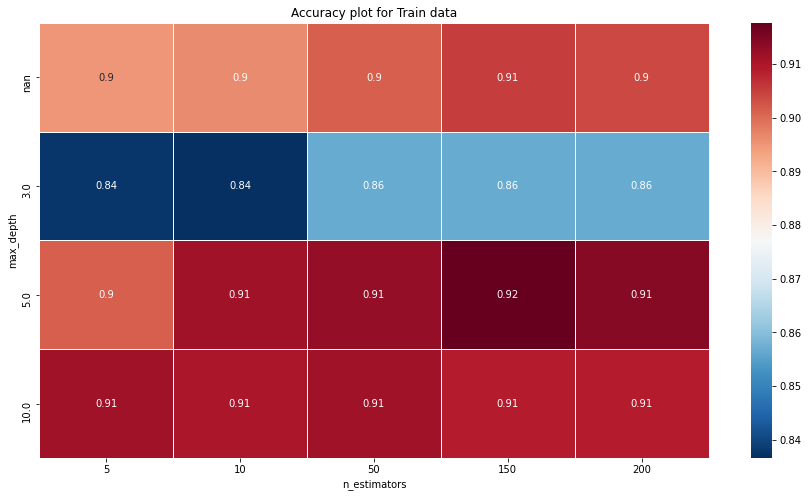

In [12]:
x=df[['Day','State ID','Lat','Long_','Incident_Rate','Active','Total_Test_Results','Case_Fatality_Ratio','Testing_Rate','Density Rank 2020 Census','SexRatio']].values

y2=df['Recovered'].values

x_train,x_test,y_train,y_test = train_test_split(x,y2,test_size = 0.2, random_state = 0)

grid_param = {'n_estimators': [5,10,50,150,200],
             'max_depth':[3,5,10,None], 'random_state':[0]}
random_forest= RandomForestClassifier()

random_grid= RandomizedSearchCV(estimator= random_forest, param_distributions=grid_param, n_iter=200, cv=10, verbose=1, random_state=42,n_jobs=-1)

random_grid.fit(x_train,y_train)

ac_df=pd.DataFrame(random_grid.cv_results_['params'])

ac_df["accuracy"]=random_grid.cv_results_['mean_test_score']

ac_df=ac_df.pivot(index='max_depth',columns='n_estimators',values='accuracy')
plt.figure(figsize=(15,8))
sns.heatmap(data=ac_df,cmap='RdBu_r',
            annot=True,
            linewidth=0.5)
plt.title("Accuracy plot for Train data")
plt.show()

Figure 3 Accuracy plot for train data based on number of estimators and maximum depth in Hyper-Parameter Tuning- Label 3 for orginal database

Initially, the data is split with 80% of the data used for training and 20% percent of the data left for testing. The Random Forest Classifier is intialiazed with max depth being:{3,5,10,None}(1). The data is classified using Decision trees with the number of trees being: {5,10,50,150,200}. K-fold cross validation is used with k being 10 for the trees.'RandomizedSearchCV' is used to find the best values for the classifier(2). The accuracy of the trained estimators is reported on a heat plot using the heatmap command from the Seaborn library(3).

# Best Parameter Evaluation:

In [13]:
random_grid.best_params_

{'random_state': 0, 'n_estimators': 150, 'max_depth': 5}

In [14]:
random_grid.best_score_

0.9176697530864197

In [15]:
random_grid.best_estimator_

RandomForestClassifier(max_depth=5, n_estimators=150, random_state=0)

The best parameter for the Random Forest Classifier is the one that has a max-depth of 5 with the number of trees being 150.

# Parameter Testing:

In [16]:
random_forest= RandomForestClassifier(max_depth=5, n_estimators=150, random_state=0)
random_forest.fit(x_train,y_train)
y_pred=random_forest.predict(x_test)
print("Accuracy on test set: " ,accuracy_score(y_test,y_pred))

Accuracy on test set:  0.945273631840796


The accuracy of the test set for the trained classifier is approximately 94.53 percent and this shows that the classifier is great at predicting the output for the label with less than 6 percent of error.

# 2. PCA Features:

In [17]:
pcaf=pd.read_csv('PCAFeatures.csv')
pcaf.describe()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8
count,1.003000e+03,1003.000000,1.003000e+03,1.003000e+03,1.003000e+03,1.003000e+03,1.003000e+03,1.003000e+03
mean,-8.855219e-19,0.000000,1.416835e-17,1.133468e-16,3.542087e-17,2.125252e-17,4.250505e-17,-1.416835e-17
std,1.896813e+00,1.316211,1.124108e+00,1.072333e+00,9.409481e-01,8.106868e-01,7.809744e-01,7.365326e-01
min,-3.395668e+00,-2.586852,-2.378357e+00,-2.611054e+00,-1.805029e+00,-1.503267e+00,-1.670704e+00,-1.283876e+00
25%,-1.473418e+00,-0.984843,-6.715774e-01,-8.501743e-01,-7.552188e-01,-5.121509e-01,-5.703046e-01,-5.730587e-01
50%,-2.873339e-01,0.014709,-8.730318e-02,-7.964920e-03,-8.020204e-02,-9.424572e-02,-8.949131e-02,-9.327186e-02
75%,1.332222e+00,0.881105,6.007261e-01,8.309940e-01,7.481521e-01,2.971319e-01,4.938777e-01,4.927044e-01
max,3.634080e+00,4.258121,2.692125e+00,2.696974e+00,2.599336e+00,2.738488e+00,2.381606e+00,1.795647e+00


# Hyper-Parameter Tuning- Label 1('Confirmed'):

Fitting 10 folds for each of 20 candidates, totalling 200 fits


c:\python\python39\lib\site-packages\sklearn\model_selection\_search.py:285: UserWarning: The total space of parameters 20 is smaller than n_iter=200. Running 20 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


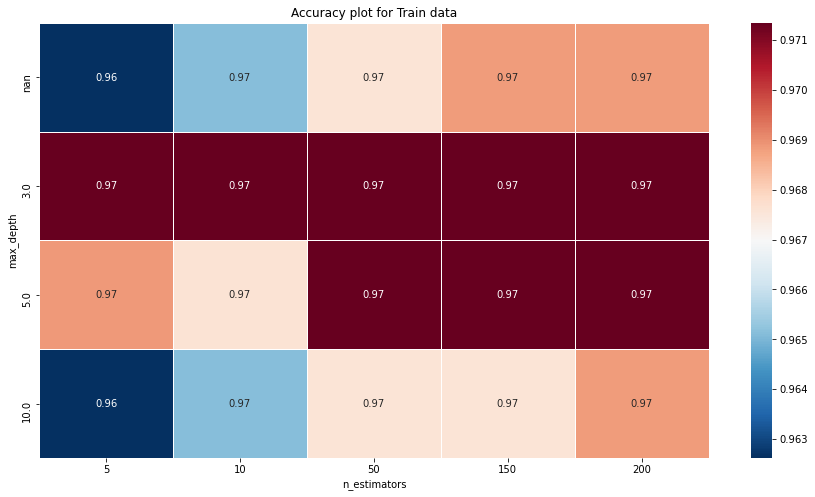

In [18]:
x=pcaf[['PC1','PC2','PC3','PC4','PC5','PC6','PC7','PC8']].values

y=pcaf['Confirmed'].values

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2, random_state = 0)

grid_param = {'n_estimators': [5,10,50,150,200],
             'max_depth':[3,5,10,None], 'random_state':[0]}
random_forest= RandomForestClassifier()

random_grid= RandomizedSearchCV(estimator= random_forest, param_distributions=grid_param, n_iter=200, cv=10, verbose=1, random_state=42,n_jobs=-1)

random_grid.fit(x_train,y_train)

ac_df=pd.DataFrame(random_grid.cv_results_['params'])

ac_df["accuracy"]=random_grid.cv_results_['mean_test_score']

ac_df=ac_df.pivot(index='max_depth',columns='n_estimators',values='accuracy')
plt.figure(figsize=(15,8))
sns.heatmap(data=ac_df,cmap='RdBu_r',
            annot=True,
            linewidth=0.5)
plt.title("Accuracy plot for Train data")
plt.show()

Figure 4 Accuracy plot for train data based on number of estimators and maximum depth in Hyper-Parameter Tuning- Label 1 for extracted feature by PCA

Initially, the data is split with 80% of the data used for training and 20% percent of the data left for testing. The Random Forest Classifier is intialiazed with max depth being:{3,5,10,None}(1). The data is classified using Decision trees with the number of trees being: {5,10,50,150,200}. K-fold cross validation is used with k being 10 for the trees.'RandomizedSearchCV' is used to find the best values for the classifier(2). The accuracy of the trained estimators is reported on a heat plot using the heatmap command from the Seaborn library(3).

# Best Parameter Evaluation:

In [19]:
random_grid.best_params_

{'random_state': 0, 'n_estimators': 5, 'max_depth': 3}

In [20]:
random_grid.best_score_

0.9713425925925925

In [21]:
random_grid.best_estimator_

RandomForestClassifier(max_depth=3, n_estimators=5, random_state=0)

The best parameter for the Random Forest Classifier is the one that has a max-depth of 3 with the number of trees being 5.

# Parameter Testing:

In [22]:
random_forest= RandomForestClassifier(max_depth=3, n_estimators=5, random_state=0)
random_forest.fit(x_train,y_train)
y_pred=random_forest.predict(x_test)
print("Accuracy on test set: " ,accuracy_score(y_test,y_pred))

Accuracy on test set:  0.9601990049751243


The accuracy of the test set for the trained classifier is approximately 96 percent and this shows that the classifier is great at predicting the output for the label with less than 4 percent of error.

# Hyper-Parameter Tuning- Label 2('Deaths'):

Fitting 10 folds for each of 20 candidates, totalling 200 fits


c:\python\python39\lib\site-packages\sklearn\model_selection\_search.py:285: UserWarning: The total space of parameters 20 is smaller than n_iter=200. Running 20 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


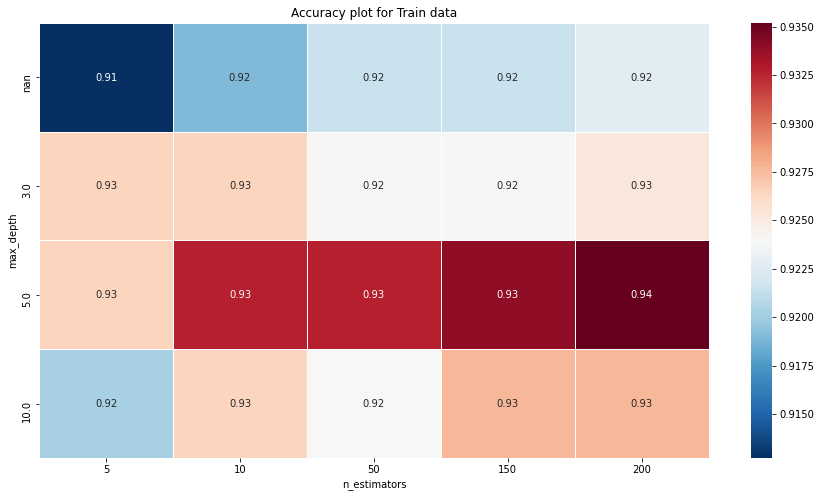

In [23]:
x=pcaf[['PC1','PC2','PC3','PC4','PC5','PC6','PC7','PC8']].values

y1=pcaf['Deaths'].values

x_train,x_test,y_train,y_test = train_test_split(x,y1,test_size = 0.2, random_state = 0)

grid_param = {'n_estimators': [5,10,50,150,200],
             'max_depth':[3,5,10,None], 'random_state':[0]}
random_forest= RandomForestClassifier()

random_grid= RandomizedSearchCV(estimator= random_forest, param_distributions=grid_param, n_iter=200, cv=10, verbose=1, random_state=42,n_jobs=-1)

random_grid.fit(x_train,y_train)

ac_df=pd.DataFrame(random_grid.cv_results_['params'])

ac_df["accuracy"]=random_grid.cv_results_['mean_test_score']

ac_df=ac_df.pivot(index='max_depth',columns='n_estimators',values='accuracy')
plt.figure(figsize=(15,8))
sns.heatmap(data=ac_df,cmap='RdBu_r',
            annot=True,
            linewidth=0.5)
plt.title("Accuracy plot for Train data")
plt.show()

Figure 5 Accuracy plot for train data based on number of estimators and maximum depth in Hyper-Parameter Tuning- Label 2 for extracted feature by PCA

Initially, the data is split with 80% of the data used for training and 20% percent of the data left for testing. The Random Forest Classifier is intialiazed with max depth being:{3,5,10,None}(1). The data is classified using Decision trees with the number of trees being: {5,10,50,150,200}. K-fold cross validation is used with k being 10 for the trees.'RandomizedSearchCV' is used to find the best values for the classifier(2). The accuracy of the trained estimators is reported on a heat plot using the heatmap command from the Seaborn library(3).

# Best Parameter Evaluation:

In [24]:
random_grid.best_params_

{'random_state': 0, 'n_estimators': 200, 'max_depth': 5}

In [25]:
random_grid.best_score_

0.9351851851851853

In [26]:
random_grid.best_estimator_

RandomForestClassifier(max_depth=5, n_estimators=200, random_state=0)

The best parameter for the Random Forest Classifier is the one that has a max-depth of 5 with the number of trees being 200.

# Parameter Testing:

In [27]:
random_forest= RandomForestClassifier(max_depth=5, n_estimators=200, random_state=0)
random_forest.fit(x_train,y_train)
y_pred=random_forest.predict(x_test)
print("Accuracy on test set: " ,accuracy_score(y_test,y_pred))

Accuracy on test set:  0.9303482587064676


The accuracy of the test set for the trained classifier is approximately 93.04 percent and this shows that the classifier is great at predicting the output for the label with less than 7 percent of error.

# Hyper-Parameter Tuning- Label 3('Recovered'):

Fitting 10 folds for each of 20 candidates, totalling 200 fits


c:\python\python39\lib\site-packages\sklearn\model_selection\_search.py:285: UserWarning: The total space of parameters 20 is smaller than n_iter=200. Running 20 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


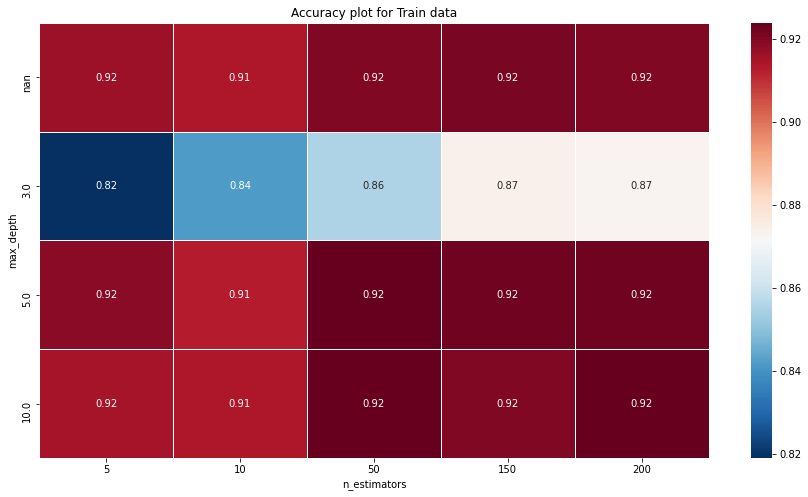

In [28]:
x=pcaf[['PC1','PC2','PC3','PC4','PC5','PC6','PC7','PC8']].values

y2=pcaf['Recovered'].values

x_train,x_test,y_train,y_test = train_test_split(x,y2,test_size = 0.2, random_state = 0)

grid_param = {'n_estimators': [5,10,50,150,200],
             'max_depth':[3,5,10,None], 'random_state':[0]}
random_forest= RandomForestClassifier()

random_grid= RandomizedSearchCV(estimator= random_forest, param_distributions=grid_param, n_iter=200, cv=10, verbose=1, random_state=42,n_jobs=-1)

random_grid.fit(x_train,y_train)

ac_df=pd.DataFrame(random_grid.cv_results_['params'])

ac_df["accuracy"]=random_grid.cv_results_['mean_test_score']

ac_df=ac_df.pivot(index='max_depth',columns='n_estimators',values='accuracy')
plt.figure(figsize=(15,8))
sns.heatmap(data=ac_df,cmap='RdBu_r',
            annot=True,
            linewidth=0.5)
plt.title("Accuracy plot for Train data")
plt.show()

Figure 6 Accuracy plot for train data based on number of estimators and maximum depth in Hyper-Parameter Tuning- Label 3 for extracted feature by PCA

Initially, the data is split with 80% of the data used for training and 20% percent of the data left for testing. The Random Forest Classifier is intialiazed with max depth being:{3,5,10,None}(1). The data is classified using Decision trees with the number of trees being: {5,10,50,150,200}. K-fold cross validation is used with k being 10 for the trees.'RandomizedSearchCV' is used to find the best values for the classifier(2). The accuracy of the trained estimators is reported on a heat plot using the heatmap command from the Seaborn library(3).

# Best Parameter Evaluation:

In [29]:
random_grid.best_params_

{'random_state': 0, 'n_estimators': 200, 'max_depth': 10}

In [30]:
random_grid.best_score_

0.9239197530864198

In [31]:
random_grid.best_estimator_

RandomForestClassifier(max_depth=10, n_estimators=200, random_state=0)

The best parameter for the Random Forest Classifier is the one that has a max-depth of 10 with the number of trees being 200.

# Parameter Testing:

In [32]:
random_forest= RandomForestClassifier(max_depth=10, n_estimators=200, random_state=0)
random_forest.fit(x_train,y_train)
y_pred=random_forest.predict(x_test)
print("Accuracy on test set: " ,accuracy_score(y_test,y_pred))

Accuracy on test set:  0.945273631840796


The accuracy of the test set for the trained classifier is approximately 94.53 percent and this shows that the classifier is great at predicting the output for the label with less than 6 percent of error.

# References:

(1) https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html

(2) https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.RandomizedSearchCV.html

(3) https://seaborn.pydata.org/generated/seaborn.heatmap.html